In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt

1. Welke bron je gebruikt voor het ophalen van prijzen?<br>
bg.fuelo.net<br>
www.tankje.nl<br>
www.tinq.nl

2. Hoe je de data ophaalt (API, scraper, open data, andere bron)<br>
 wordt opgehaald met web scrapers

3. Hoe je de data opschoont<br>
Data wordt opgeschoond door het filteren van de pagina's.<br>
Daarna wordt alle tekst eromheen weggehaald door stript en replace.<br>
Als laatste wordt alles verwerkt in een csv bestand voor grafieken en tabellen te maken.

4. Bepaal voor elk van de drie Vissers-stations 3–5 concurrerende stations binnen een logische
afstand <br>

Tinq is gekozen omdat hun de prijzen op hun eigen website hebben staan.<br>
Daarnaast is gekeken naar tankstations die in de buurt zitten waarvan een derde partij data heeft over de prijzen aangezien deze niet beschikbaar is op andere manieren.

In [2]:
#Esso Vissers Horst

#Texaco horst - https://bg.fuelo.net/gasstation/id/38090?lang=bg
#BP Express Sevenum - https://www.tankje.nl/GasStation/Details/2445
#TinQ Venray Henri Dunanstraat - https://www.tinq.nl/tankstations/venray-henri-dunantstraat#default

In [3]:
#BP Vissers Afferden
#Tango druten - https://www.brandstof-zoeker.nl/station/tango-druten-8931/
#TinQ druten - https://www.tinq.nl/tankstations/druten-industrieweg#default
#TinQ Winssen - Leegstraat - https://www.tinq.nl/tankstations/winssen-leegstraat#default
#TinQ Megen - Noord zuid - https://www.tinq.nl/tankstations/megen-noord-zuid#default

In [4]:
#Esso Vissers Bergh Noord
#shell babberich - https://bg.fuelo.net/gasstation/id/37998
#Kuster energy - https://www.tankje.nl/GasStation/Details/2587
#TinQ zevenaar - https://www.tinq.nl/tankstations/zevenaar-edisonstraat#default
#TinQ Millingen aan de Rijn - https://www.tinq.nl/tankstations/millingen-aan-de-rijn-heerbaan#default


In [5]:
urls = [['Texaco horst','https://bg.fuelo.net/gasstation/id/38090?lang=bg','Esso Vissers Horst'],
        ['BP Express Sevenum','https://www.tankje.nl/GasStation/Details/2445','Esso Vissers Horst'],
        ['TinQ Venray Henri Dunanstraat','https://www.tinq.nl/tankstations/venray-henri-dunantstraat#default','Esso Vissers Horst'],
        ['TinQ druten','https://www.tinq.nl/tankstations/druten-industrieweg#default','BP Vissers Afferden'],
        ['TinQ Winssen - Leegstraat','https://www.tinq.nl/tankstations/winssen-leegstraat#default','BP Vissers Afferden'],
        ['TinQ Megen - Noord zuid','https://www.tinq.nl/tankstations/megen-noord-zuid#default','BP Vissers Afferden'],
        ['shell babberich','https://bg.fuelo.net/gasstation/id/37998','Esso Vissers Bergh Noord'],
        ['Kuster energy','https://www.tankje.nl/GasStation/Details/2587','Esso Vissers Bergh Noord'],
        ['TinQ zevenaar','https://www.tinq.nl/tankstations/zevenaar-edisonstraat#default','Esso Vissers Bergh Noord'],
        ['TinQ Millingen aan de Rijn','https://www.tinq.nl/tankstations/millingen-aan-de-rijn-heerbaan#default','Esso Vissers Bergh Noord']
        ]

In [ ]:
#Tinq
def Get_Tinq_Data(url):
    """
    Main function for getting data of fuel prices from TinQ.
    """
    #Pagina ophalen
    page = requests.get(url=url)
    soup = BeautifulSoup(page.text,'html')
    fuel_names = Get_Fuel_Names_Tinq(soup=soup)
    fuel_prices = Get_Fuel_Prices_Tinq(soup=soup)
    return fuel_names,fuel_prices
    
def Get_Fuel_Names_Tinq(soup):
    """
    Get all fuel names that are at the Tinq stations.
    """
    #Element van de pagina uitzoeken
    benzine_soort = soup.find_all('div',class_='field field--name-taxonomy-term-title field--type-ds field--label-hidden field__item')
    benzine_namen = [benzine.text for benzine in benzine_soort]
    cleaned_benzine_namen = []
    #Brandstof naam ophalen
    for benzine in benzine_namen:
        benzine = benzine.replace('\n','').strip()
        cleaned_benzine_namen.append(benzine)
        
    return cleaned_benzine_namen

def Get_Fuel_Prices_Tinq(soup):
    """
    Get all prices of the fuel the station has.
    """
    #Element van de pagina uitzoeken
    prijzen = soup.find_all('div',class_='field field--name-field-prices-price-pump field--type-float field--label-hidden field__item')
    prijzen_lijst = [prijs.text for prijs in prijzen]
    cleaned_prijzen_namen = []
    #Prijzen ophalen
    for prijs in prijzen_lijst:
        prijs = prijs.replace('\n','').replace('/L','').replace('EUR','').replace('€ ','').strip()
        cleaned_prijzen_namen.append(prijs)
        
    return cleaned_prijzen_namen

In [ ]:
#fuelo
def Get_Fuelo_Data(url):
    """
    Main function for getting data of fuel prices from Fuelo.
    """
    #Pagina ophalen
    headers = {"Accept-Language": "en-US,en;q=0.5"}
    page = requests.get(url=url,headers=headers)
    soup = BeautifulSoup(page.text,'html')
    prices = Get_Fuel_Prices_Fuelo(soup=soup)
    fuel_names = Get_Fuel_Names_Fuelo(soup=soup) 
    return fuel_names,prices

def Get_Fuel_Prices_Fuelo(soup):
    """
    Get all prices of the fuel the station has.
    """
    #Element van de pagina uitzoeken
    prijzen = soup.find_all('span',itemprop='price')
    prices = []
    #Prijzen ophalen
    for x in prijzen:
        prices.append(x.text.strip())  
    return prices

def Get_Fuel_Names_Fuelo(soup):
    """
    Get all fuel names that are at the Tinq stations.
    """
    #Element van de pagina uitzoeken
    brandstoffen = soup.find_all('td',itemprop='name')
    brandstoffen_Cleaned = []
    #Brandstof naam ophalen
    for y in brandstoffen:
        brandstoffen_Cleaned.append(y.text.strip())
    return brandstoffen_Cleaned

In [ ]:
#Tankje
def Get_Tankje_Data(url):
    """
    Main function for getting data of fuel prices from Tankje.
    """
    #Pagina ophalen
    page = requests.get(url=url)
    soup = BeautifulSoup(page.text,'html')
    prices = Get_Fuel_Prices_Tankje(soup=soup)
    fuel_names = Get_Fuel_Names_Tankje(soup=soup) 
    return fuel_names,prices

def Get_Fuel_Prices_Tankje(soup):
    """
    Get all prices of the fuel the station has.
    """
    #Element van de pagina uitzoeken
    prijzen = soup.find_all('div',class_='h3 text-danger mb-2')
    prices = []
    #Prijzen ophalen
    for x in prijzen:
        prices.append(x.text.replace('€ ','').strip())  
    return prices

def Get_Fuel_Names_Tankje(soup):
    """
    Get all fuel names that are at the Tinq stations.
    """
    #Element van de pagina uitzoeken
    brandstoffen = soup.find_all('h4',class_='h6 mb-0')
    brandstoffen_Cleaned = []
    #Brandstof naam ophalen
    for y in brandstoffen:
        brandstoffen_Cleaned.append(y.text.strip())
    return brandstoffen_Cleaned

In [ ]:
def Safe_To_File(row):
    #Data opslaan in een csv
    for x in range(len(row[4])):
        df_new = pd.DataFrame([[row[0],row[1],row[2],row[3][x],row[4][x],row[5]]])
        df_new.to_csv("tank_data.csv", mode="a", header=False, index=False)

    

In [ ]:
def get_Data():
    #van alle linkjes de prijzen ophalen
    for url in urls:
        new_row = []
        if 'fuelo' in url[1]:
            fuel,price = Get_Fuelo_Data(url[1])
        elif 'tankje' in url[1]:
            fuel,price = Get_Tankje_Data(url[1])
        elif 'tinq' in url[1]:
            fuel,price = Get_Tinq_Data(url[1])
        new_row.append(url[0])
        new_row.append(url[1])
        new_row.append(url[2])
        new_row.append(fuel)
        new_row.append(price)
        new_row.append(datetime.datetime.today().strftime('%Y-%m-%d'))
        Safe_To_File(new_row)
        
get_Data()

In [ ]:
df = pd.read_csv('tank_data.csv')
#Kleuren voor de plot
kleuren = ['b','g','y']

In [ ]:
#Namen aanpassen en lege waardes weghalen
df = df[df['prijs'] != '0,000']
df['day'] = df['datum'].str.split('-').str[2]
df.loc[df['brandstof'] == 'FuelSave Euro 95','brandstof'] = 'Euro 95'
df.loc[df['brandstof'] == 'Euro95 E10','brandstof'] = 'Euro 95'
df.loc[df['brandstof'] == 'FuelSave Diesel','brandstof'] = 'Diesel'
df.loc[df['brandstof'] == 'Diesel B7','brandstof'] = 'Diesel'

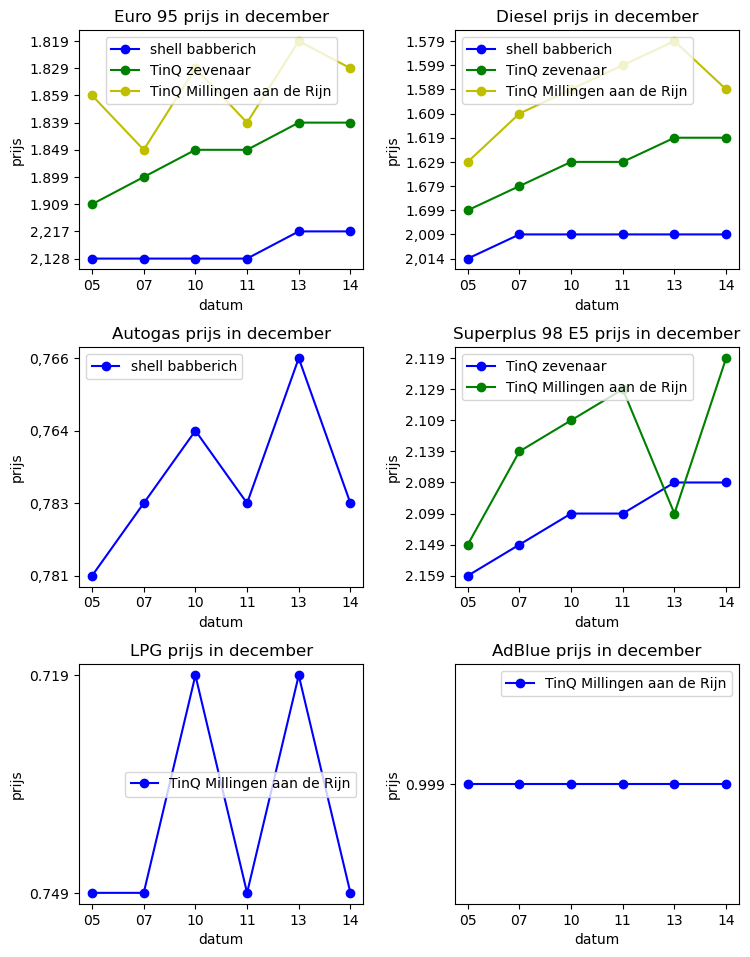

In [ ]:
#Esso Vissers Horst
df_horst = df[df['koppelbedrijf'] == 'Esso Vissers Bergh Noord']
fuels = df_horst.brandstof.unique()
fig, axs = plt.subplots(3,2,figsize=(8,10))
fig.tight_layout(pad=3.5)  
i = 0
#Data visualiseren
for x in range(0,3):
    for y in range(0,2):
        df_fuel = df_horst[df_horst['brandstof']== fuels[i]]
        j = 0
        for station in df_fuel.Naam.unique():
            df_station = df_fuel[df_fuel['Naam'] == station]
            axs[x, y].plot(df_station.day, df_station.prijs, label=station, marker='o',color=kleuren[j])
            j = j + 1
        axs[x, y].set_title(f'{fuels[i]} prijs in december')
        axs[x, y].set_xlabel('datum')
        axs[x, y].set_ylabel('prijs')
        axs[x, y].legend()

        i = i + 1
plt.show()

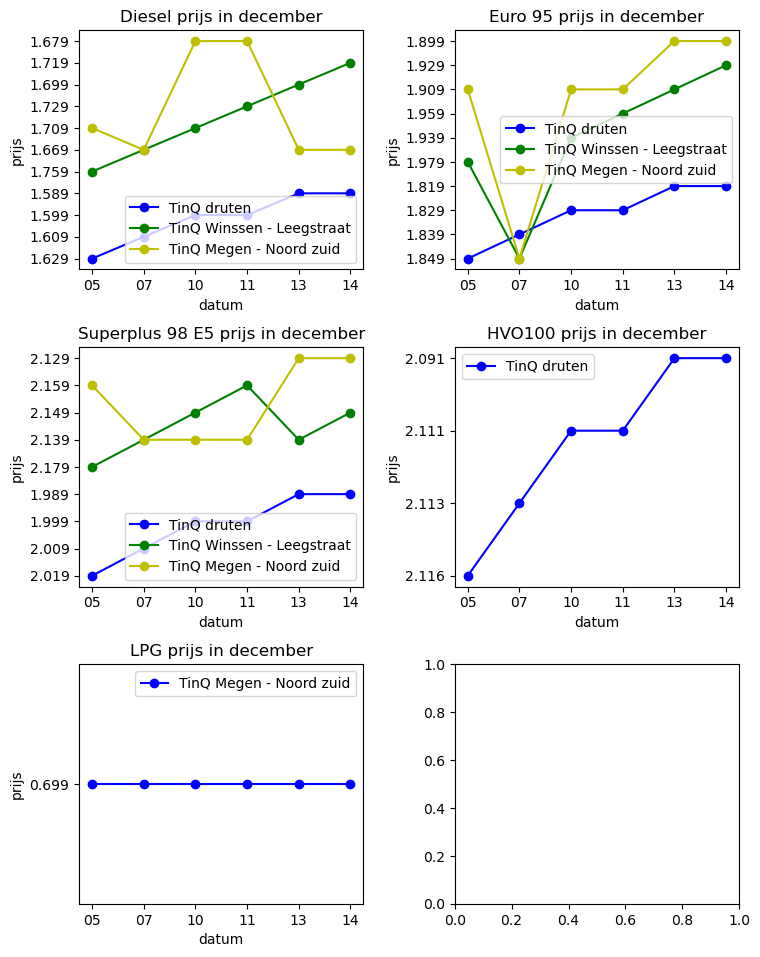

In [ ]:
#BP Vissers Afferden
df_afferden = df[df['koppelbedrijf'] == 'BP Vissers Afferden']
fuels = df_afferden.brandstof.unique()
fig, axs = plt.subplots(3,2,figsize=(8,10))
fig.tight_layout(pad=3.5)  
i = 0
#Data visualiseren
for x in range(0,3):
    for y in range(0,2):
        if i != 5:
            df_fuel = df_afferden[df_afferden['brandstof']== fuels[i]]
            j = 0
            for station in df_fuel.Naam.unique():
                df_station = df_fuel[df_fuel['Naam'] == station]
                axs[x, y].plot(df_station.day, df_station.prijs, label=station, marker='o',color= kleuren[j])
                j = j + 1
            axs[x, y].set_title(f'{fuels[i]} prijs in december')
            axs[x, y].set_xlabel('datum')
            axs[x, y].set_ylabel('prijs')
            axs[x, y].legend()
        i = i + 1
plt.show()

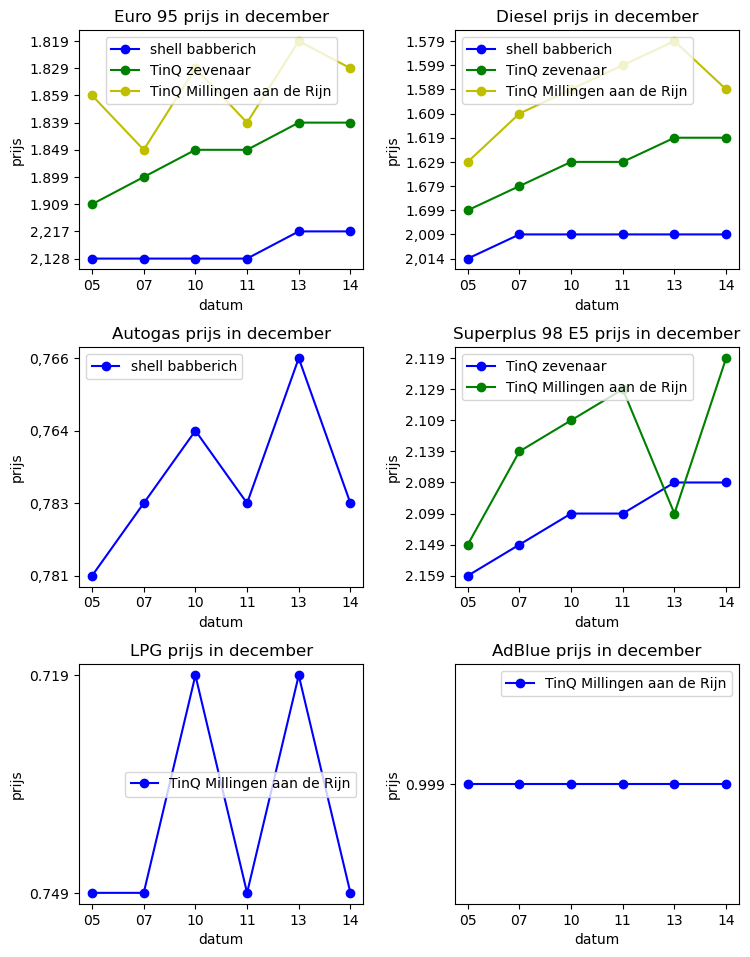

In [ ]:
#Esso Vissers Bergh Noord
df_bergh = df[df['koppelbedrijf'] == 'Esso Vissers Bergh Noord']
fuels = df_bergh.brandstof.unique()
fig, axs = plt.subplots(3,2,figsize=(8,10))
fig.tight_layout(pad=3.5)  
i = 0
#Data visualiseren
for x in range(0,3):
    for y in range(0,2):
        df_fuel = df_bergh[df_bergh['brandstof']== fuels[i]]
        j = 0
        for station in df_fuel.Naam.unique():
            df_station = df_fuel[df_fuel['Naam'] == station]
            axs[x, y].plot(df_station.day, df_station.prijs, label=station, marker='o',color=kleuren[j])
            j = j + 1
        axs[x, y].set_title(f'{fuels[i]} prijs in december')
        axs[x, y].set_xlabel('datum')
        axs[x, y].set_ylabel('prijs')
        axs[x, y].legend()
        i = i + 1
plt.show()

6. Geef aan welke beperkingen je bent tegengekomen en welke vragen je hebt.<br>

Beperkingen zijn vooral dat veel tankstations hun prijzen niet online hebben staan. Hierdoor is er een grote kans dat de data niet up to date is of dat deze incorrect is.<br>
Een andere beperking is dat niet alle websites scraping toestaan waardoor we nog meer gelimiteerd zijn van waar de data vandaan kan komen.


7. Formuleer korte aanbevelingen voor hoe dit proces geschikter zou worden voor gebruik in
een prijsbepalingsmodel

Om de prijs te bepalen kun je kijken naar hoe sterk de concurrentie is van nabijgelegen tankstations. Op basis daarvan kun je bepalen hoe duur of goedkoop je eigen brandstof moet zijn.<br>
Sommige merken, zoals Tinq, leveren betrouwbaardere prijsgegevens. Daardoor kun je ze meer gewicht geven in de berekening.<br>
Daarnaast speelt de afstand een grote rol:
als een concurrerend tankstation bijvoorbeeld maar 2 kilometer verderop ligt, is het belangrijk dat jouw prijs niet teveel afwijkt van die in de buurt.<br><br>
In de data staat nu geen afstand van de tankstations waardoor iedere tankstation momenteel als evenzwaar meetelt.<br>
